# Notebook SAE 202

## Partie II


In [1]:
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sc
import soundfile as sf
import time
import threading


### Reception

In [10]:
fs = 10000
def callback(indata, outdata, frames, time, status):
    if status:
        print(status)
    outdata[:] = indata
stream = sd.Stream(samplerate=fs, callback=callback)
try:
    with stream:
        print("#" * 80)
        print("press Return to exit")
        print("#" * 80)
        input()
except KeyboardInterrupt:
    exit('')

################################################################################
press Return to exit
################################################################################


Démarrage du stream
Réception du chunk numéro 0 dont le premier éléments vaut [-0.18405151]
Réception du chunk numéro 1 dont le premier éléments vaut [-9.1552734e-05]
Réception du chunk numéro 2 dont le premier éléments vaut [-9.1552734e-05]
Réception du chunk numéro 3 dont le premier éléments vaut [-0.00015259]
Réception du chunk numéro 4 dont le premier éléments vaut [-0.00012207]
Réception du chunk numéro 5 dont le premier éléments vaut [-3.0517578e-05]
Réception du chunk numéro 6 dont le premier éléments vaut [0.]
Réception du chunk numéro 7 dont le premier éléments vaut [-3.0517578e-05]
Réception du chunk numéro 8 dont le premier éléments vaut [-6.1035156e-05]
Réception du chunk numéro 9 dont le premier éléments vaut [-0.00012207]
Réception du chunk numéro 10 dont le premier éléments vaut [-6.1035156e-05]
Réception du chunk numéro 11 dont le premier éléments vaut [3.0517578e-05]
Réception du chunk numéro 12 dont le premier éléments vaut [-3.0517578e-05]
Réception du chunk numéro 1

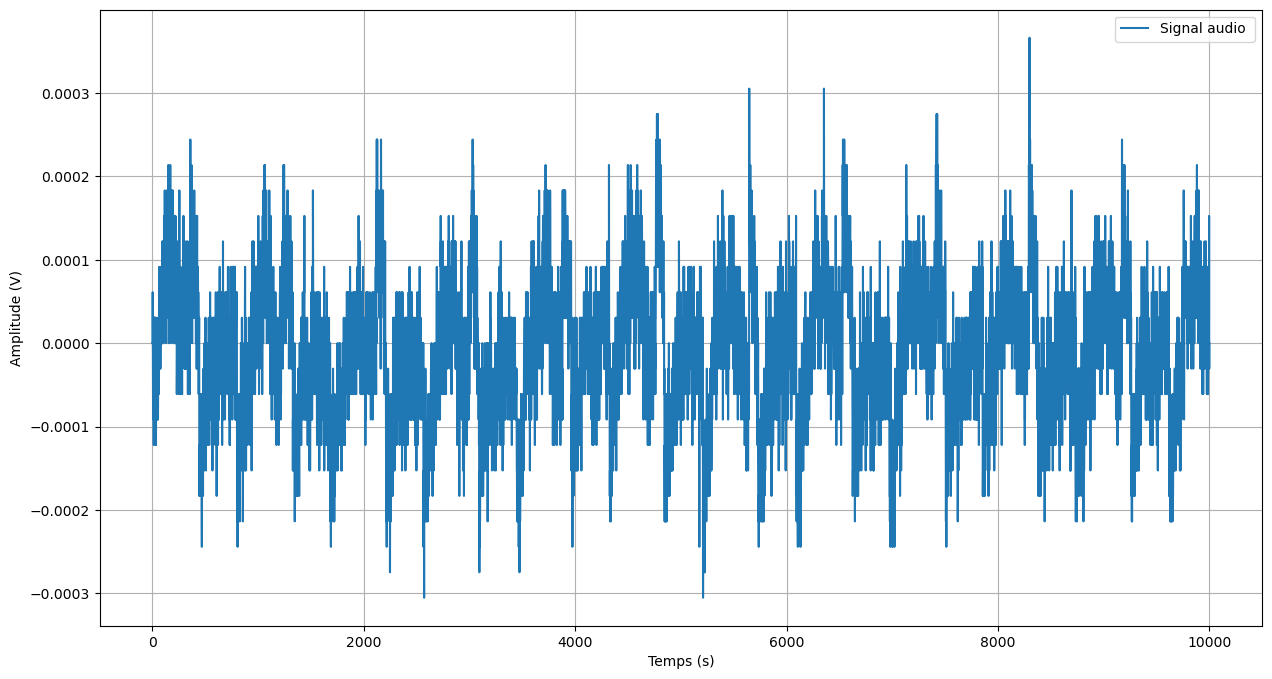

In [8]:
#print(sd.query_devices())

nombre_blocs = 0
signal = 0

def print_number(indata, frames, time, status):
    global nombre_blocs
    print(f"Réception du chunk numéro {nombre_blocs} dont le premier éléments vaut {indata[0]}")
    nombre_blocs += 1
    global signal
    signal = indata
stream = sd.InputStream(callback=print_number, blocksize=10000, channels=1)
print("Démarrage du stream")
stream.start()
time.sleep(30)
stream.stop()
print("FIn du stream")
print(f"{nombre_blocs} bloc ont été reçu")
sd.play(signal, samplerate=10000)
print(signal)

fig, ax = plt.subplots(1, 1, figsize=(15, 8))

ax.plot(signal, label="Signal audio ")
#ax[0].semilogx(f_tranche, fft_mono_dbm, linewidth = 2)
ax.set_xlabel("Temps (s)")
ax.set_ylabel("Amplitude (V)")
#ax[0].set_xlim(10, 10.01)
ax.legend(loc="upper right")
ax.grid(True)


### Emission

In [4]:
print(sd.query_devices())

   0 Mappeur de sons Microsoft - Input, MME (2 in, 0 out)
>  1 Microphone (USB Audio Device), MME (1 in, 0 out)
   2 Microphone (Conexant ISST Audio, MME (2 in, 0 out)
   3 Mappeur de sons Microsoft - Output, MME (0 in, 2 out)
<  4 Haut-parleurs (USB Audio Device, MME (0 in, 2 out)
   5 Haut-parleur (Conexant ISST Aud, MME (0 in, 6 out)
   6 Réseau de microphones (Conexant ISST Audio capture), Windows WDM-KS (2 in, 0 out)
   7 Mixage stéréo (Conexant ISST Audio capture), Windows WDM-KS (2 in, 0 out)
   8 Output 1 (Conexant ISST Audio output), Windows WDM-KS (0 in, 2 out)
   9 Output 2 (Conexant ISST Audio output), Windows WDM-KS (0 in, 6 out)
  10 Input (Conexant ISST Audio output), Windows WDM-KS (2 in, 0 out)
  11 Headphones (Conexant ISST Audio headphone), Windows WDM-KS (0 in, 2 out)
  12 Casque (@System32\drivers\bthhfenum.sys,#2;%1 Hands-Free%0
;(Redmi Buds 4)), Windows WDM-KS (0 in, 1 out)
  13 Casque (@System32\drivers\bthhfenum.sys,#2;%1 Hands-Free%0
;(Redmi Buds 4)), Windows 

In [3]:
fs = 10000

def callback(indata, outdata, frames, time, status):
    if status:
        print(status)

    outdata[:] = indata
stream = sd.Stream(samplerate=fs, callback=callback)

try:
    with stream:
        print('#' * 80)
        print('press Return to quit')
        print('#' * 80)
        input()

except KeyboardInterrupt:
    exit('')


################################################################################
press Return to quit
################################################################################


In [ ]:
event = threading.Event()

try:
    data, fs = sf.read('NR4.wav', always_2d=True)
    current_frame